<a href="https://colab.research.google.com/github/KatrinPal/Katrincodes/blob/main/17_08_24_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###

In [4]:
import pandas as pd

In [5]:
advertising = pd.read_csv('/content/tvmarketing.csv')

# TV- advertising budget spent on TV marketing
# sales - how much we have sold (revenue, income)

In [6]:
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [7]:
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


### regression plot

In [8]:
import seaborn as sns

<Axes: xlabel='TV', ylabel='Sales'>

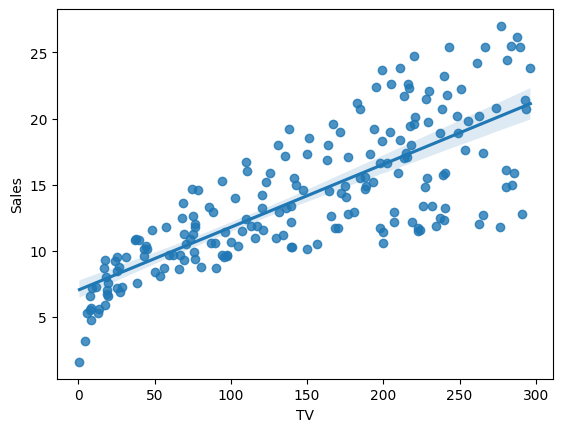

In [11]:
sns.regplot(x='TV', y='Sales', data=advertising)

<Axes: xlabel='TV', ylabel='Sales'>

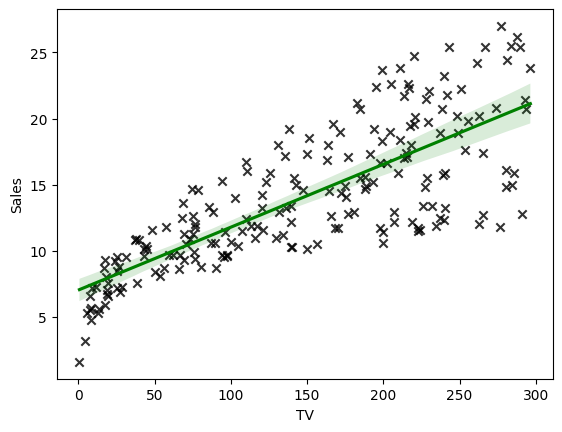

In [12]:
    sns.regplot(
    data=advertising,
    x='TV',
    y="Sales",
    ci=99,
    marker="x",
    color="black",
    line_kws=dict(color="green"))

In [13]:
# Pearson correlation koefficient
advertising.corr() # calculate corr for whole dataframe

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


In [14]:
advertising['TV'].corr(advertising['Sales']) # positive, strong (the closer to 1, the stronger the correlation); Weak Correlation: 0 to ±0.3, Moderate Correlation: ±0.3 to ±0.7, Strong Correlation: ±0.7 to ±1.0

0.7822244248616061

### SUPERVISED VS UNSUPERVISED; (linear correlation is supervised.)
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [17]:
# Preparing X and Y

X = advertising.drop('Sales', axis=1) # independent variable
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [18]:
Y = advertising.drop('TV', axis=1) # dependent variable, the outcome
Y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


### Train/Test sets

In [20]:
from sklearn.model_selection import train_test_split

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7)
X_train

,TV
83,68.4
162,188.4
105,137.9
97,184.9
174,222.4
...,...
35,290.7
104,238.2
3,151.5
7,120.2


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, random_state=42) # random_state=42 on selleks, et iga kord pärast 'run' saab sama tulemuse, et ta ei muudaks järjekorda!
X_train

,TV
169,284.3
97,184.9
31,112.9
12,23.8
35,290.7
...,...
106,25.0
14,204.1
92,217.7
179,165.6


In [25]:
![jupyter.png](https://miro.medium.com/v2/resize:fit:960/1*31iqrQyCqIuuGPLUK_BjMQ.png)

/bin/bash: -c: line 1: syntax error near unexpected token `https://miro.medium.com/v2/resize:fit:960/1*31iqrQyCqIuuGPLUK_BjMQ.png'
/bin/bash: -c: line 1: `[jupyter.png](https://miro.medium.com/v2/resize:fit:960/1*31iqrQyCqIuuGPLUK_BjMQ.png)'


In [ ]:
# COLUMN - FEATURE
# ROW - OBSERVATION

### Train the model

In [28]:
from sklearn.linear_model import LinearRegression #Import the model

In [29]:
model = LinearRegression() # Initialize the model

In [30]:
model.fit(X_train, y_train) # Train the model; fit the model

LinearRegression()

### Y = mX + b ### Linear regression



In [31]:
### Y = mX + b ###
print(f'Model intercept is: {model.intercept_}')
print(f'Model coefficient is: {model.coef_}')

Model intercept is: [7.23945983]
Model coefficient is: [[0.0464078]]


In [40]:
my_new_budget = [[50]] # 2D array dataset.

my_predicted_sales = model.predict(my_new_budget)

print(f'When the n budget is {my_new_budget[0][0]}, then predicted sales are {round(my_predicted_sales[0][0])}') # lisame juurde 'round', siis ümardab täisarvuni


When the n budget is 50, then predicted sales are 10


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [41]:
X_test.head()

,TV
95,163.3
15,195.4
30,292.9
158,11.7
128,220.3


In [42]:
y_pred = model.predict(X_test)

In [43]:
final_df = pd.DataFrame()
final_df['TV'] = X_test
final_df['Actual Sales'] = y_test
final_df['Predicted_sales'] = y_pred
final_df.head()

,TV,Actual Sales,Predicted_sales
95,163.3,16.9,14.817854
15,195.4,22.4,16.307544
30,292.9,21.4,20.832305
158,11.7,7.3,7.782431
128,220.3,24.7,17.463099


In [44]:
final_df['ABS_Error_Actual_vs_Predicted'] = abs(final_df['Actual Sales'] - final_df['Predicted_sales'])
final_df.head()

,TV,Actual Sales,Predicted_sales,ABS_Error_Actual_vs_Predicted
95,163.3,16.9,14.817854,2.082146
15,195.4,22.4,16.307544,6.092456
30,292.9,21.4,20.832305,0.567695
158,11.7,7.3,7.782431,0.482431
128,220.3,24.7,17.463099,7.236901
